<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/introduccion_a_series_de_tiempo_Python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
bitcoin = pd.read_excel('/content/BitcoinPrice17-6-23-18-6-22.xlsx', header = 0)

In [48]:
bitcoin.head()

,Time,ClosingP,OpenP,High,Low,Volume,Rate
0,42909,2674.9,2672.8,2725.3,2652.8,8.14K,0.0008
1,42910,2502.6,2674.9,2700.0,2454.1,16.77K,-0.0644
2,42911,2477.7,2502.6,2595.0,2369.1,18.13K,-0.0099
3,42912,2394.6,2480.0,2510.4,2258.7,36.37K,-0.0335
4,42913,2521.2,2393.5,2524.0,2208.1,33.49K,0.0529


In [55]:
bitcoin.loc[0]

Time         42909
ClosingP    2674.9
OpenP       2672.8
High        2725.3
Low         2652.8
Volume       8.14K
Rate        0.0008
Name: 0, dtype: object

In [5]:
dat = pd.date_range('2017 06 23', periods = len(bitcoin),freq = 'D')

In [6]:
print(dat)

DatetimeIndex(['2017-06-23', '2017-06-24', '2017-06-25', '2017-06-26',
               '2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30',
               '2017-07-01', '2017-07-02',
               ...
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16',
               '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20',
               '2018-06-21', '2018-06-22'],
              dtype='datetime64[ns]', length=365, freq='D')


In [7]:
bitcoin.index = dat

In [8]:
bitcoin.head()

,Time,ClosingP,OpenP,High,Low,Volume,Rate
2017-06-23,42909,2674.9,2672.8,2725.3,2652.8,8.14K,0.0008
2017-06-24,42910,2502.6,2674.9,2700.0,2454.1,16.77K,-0.0644
2017-06-25,42911,2477.7,2502.6,2595.0,2369.1,18.13K,-0.0099
2017-06-26,42912,2394.6,2480.0,2510.4,2258.7,36.37K,-0.0335
2017-06-27,42913,2521.2,2393.5,2524.0,2208.1,33.49K,0.0529


In [10]:
del bitcoin['Time']

In [11]:
bitcoin.head()

,ClosingP,OpenP,High,Low,Volume,Rate
2017-06-23,2674.9,2672.8,2725.3,2652.8,8.14K,0.0008
2017-06-24,2502.6,2674.9,2700.0,2454.1,16.77K,-0.0644
2017-06-25,2477.7,2502.6,2595.0,2369.1,18.13K,-0.0099
2017-06-26,2394.6,2480.0,2510.4,2258.7,36.37K,-0.0335
2017-06-27,2521.2,2393.5,2524.0,2208.1,33.49K,0.0529


In [12]:
price = bitcoin['ClosingP']

In [13]:
price.head()

2017-06-23    2674.9
2017-06-24    2502.6
2017-06-25    2477.7
2017-06-26    2394.6
2017-06-27    2521.2
Freq: D, Name: ClosingP, dtype: float64

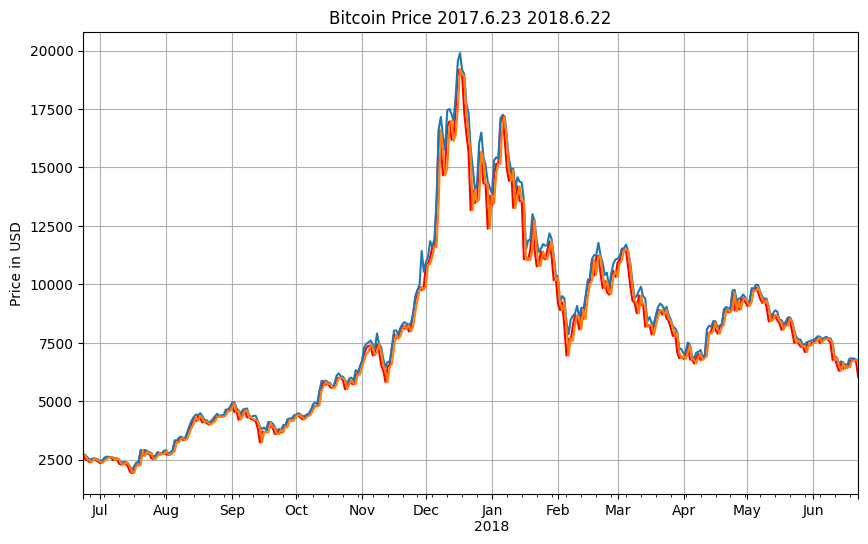

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
price.plot(color='red'); plt.title('Bitcoin Price 2017.6.23 2018.6.22')
bitcoin['High'].plot()
bitcoin['OpenP'].plot()
plt.grid()
plt.ylabel('Price in USD'); plt.show()

In [22]:
!pip install PythonTsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.1/437.1 kB 5.1 MB/s eta 0:00:00


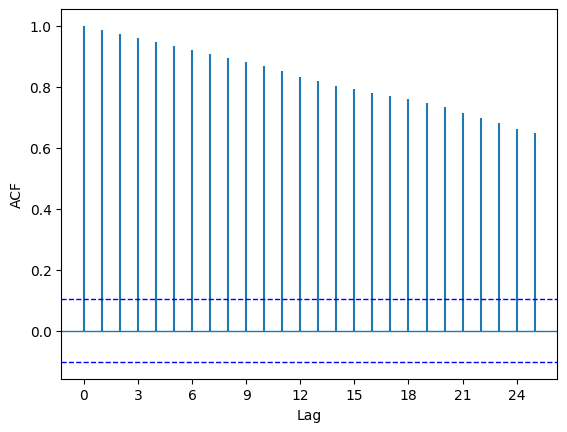

In [23]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(price, lag = 25)

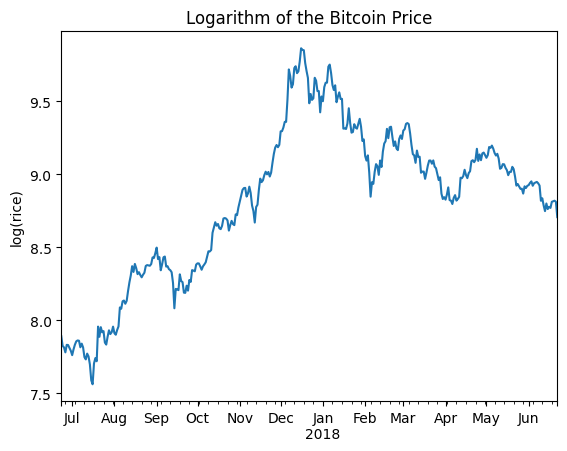

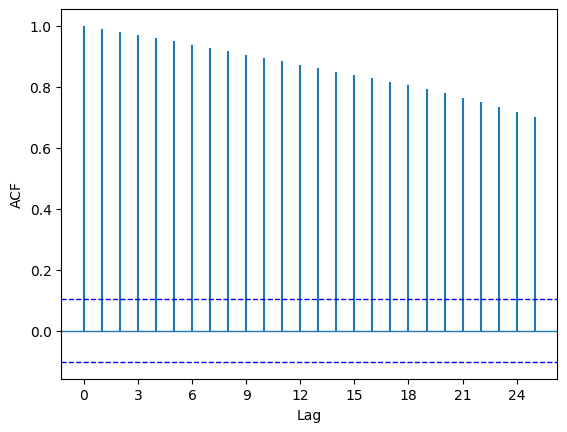

In [24]:
logp = np.log(price)
logp.plot(); plt.title('Logarithm of the Bitcoin Price')
plt.ylabel('log(rice)'); plt.show()
acf_pacf_fig(logp, lag = 25)

In [28]:
dlogp = logp.diff(1)
dlogp = dlogp.dropna() #delete "NaN"

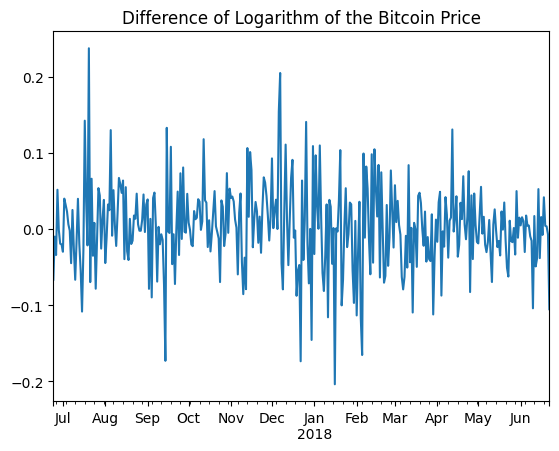

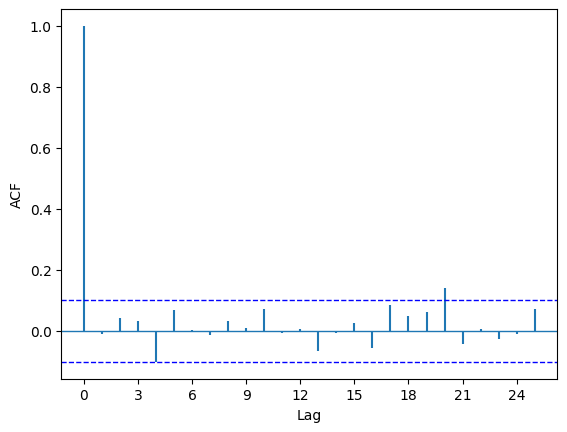

In [29]:
dlogp.plot()
plt.title('Difference of Logarithm of the Bitcoin Price')
plt.show()
acf_pacf_fig(dlogp, lag = 25)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
milk = pd.read_excel('milk.xlsx', header = None)

In [35]:
milk.head()

,0,1,2,3,4,5,6,7,8,9
0,589,561,640,656,727,697,640,599,568.0,577.0
1,553,582,600,566,653,673,742,716,660.0,617.0
2,583,587,565,598,628,618,688,705,770.0,736.0
3,678,639,604,611,594,634,658,622,709.0,722.0
4,782,756,702,653,615,621,602,635,677.0,635.0


In [40]:
len(milk)

17

In [36]:
type(milk)

pandas.core.frame.DataFrame

In [41]:
milk.loc[0]

0    589.0
1    561.0
2    640.0
3    656.0
4    727.0
5    697.0
6    640.0
7    599.0
8    568.0
9    577.0
Name: 0, dtype: float64

In [56]:
mseries = pd.concat([milk.loc[0], milk.loc[1], milk.loc[2],
milk.loc[3], milk.loc[4], milk.loc[5], milk.loc[6],
milk.loc[7], milk.loc[8], milk.loc[9], milk.loc[10],
milk.loc[11], milk.loc[12], milk.loc[13], milk.loc[14],
milk.loc[15], milk.loc[16]], ignore_index = 'true')

In [57]:
mseries.tail()

165    827.0
166    797.0
167    843.0
168      NaN
169      NaN
dtype: float64

In [59]:
type(mseries)

pandas.core.series.Series

In [60]:
mts = mseries.drop([168,169])
mts

0      589.0
1      561.0
2      640.0
3      656.0
4      727.0
       ...  
163    858.0
164    817.0
165    827.0
166    797.0
167    843.0
Length: 168, dtype: float64

In [62]:
timeindex = pd.date_range('1962 01',periods = 168,freq = 'M')

In [63]:
mts.index = timeindex
mts

1962-01-31    589.0
1962-02-28    561.0
1962-03-31    640.0
1962-04-30    656.0
1962-05-31    727.0
              ...  
1975-08-31    858.0
1975-09-30    817.0
1975-10-31    827.0
1975-11-30    797.0
1975-12-31    843.0
Freq: M, Length: 168, dtype: float64

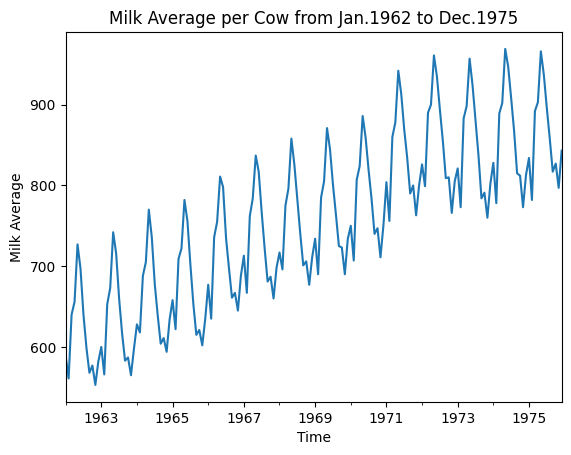

In [66]:
mts.plot()
plt.title('Milk Average per Cow from Jan.1962 to Dec.1975')
plt.xlabel('Time'); plt.ylabel('Milk Average');
plt.show()

In [67]:
my = np.array(mts).reshape(14,12)

In [68]:
my

array([[589., 561., 640., 656., 727., 697., 640., 599., 568., 577., 553.,
        582.],
       [600., 566., 653., 673., 742., 716., 660., 617., 583., 587., 565.,
        598.],
       [628., 618., 688., 705., 770., 736., 678., 639., 604., 611., 594.,
        634.],
       [658., 622., 709., 722., 782., 756., 702., 653., 615., 621., 602.,
        635.],
       [677., 635., 736., 755., 811., 798., 735., 697., 661., 667., 645.,
        688.],
       [713., 667., 762., 784., 837., 817., 767., 722., 681., 687., 660.,
        698.],
       [717., 696., 775., 796., 858., 826., 783., 740., 701., 706., 677.,
        711.],
       [734., 690., 785., 805., 871., 845., 801., 764., 725., 723., 690.,
        734.],
       [750., 707., 807., 824., 886., 859., 819., 783., 740., 747., 711.,
        751.],
       [804., 756., 860., 878., 942., 913., 869., 834., 790., 800., 763.,
        800.],
       [826., 799., 890., 900., 961., 935., 894., 855., 809., 810., 766.,
        805.],
       [821., 773., 8

In [69]:
myt = np.transpose(my)

In [70]:
myt

array([[589., 600., 628., 658., 677., 713., 717., 734., 750., 804., 826.,
        821., 828., 834.],
       [561., 566., 618., 622., 635., 667., 696., 690., 707., 756., 799.,
        773., 778., 782.],
       [640., 653., 688., 709., 736., 762., 775., 785., 807., 860., 890.,
        883., 889., 892.],
       [656., 673., 705., 722., 755., 784., 796., 805., 824., 878., 900.,
        898., 902., 903.],
       [727., 742., 770., 782., 811., 837., 858., 871., 886., 942., 961.,
        957., 969., 966.],
       [697., 716., 736., 756., 798., 817., 826., 845., 859., 913., 935.,
        924., 947., 937.],
       [640., 660., 678., 702., 735., 767., 783., 801., 819., 869., 894.,
        881., 908., 896.],
       [599., 617., 639., 653., 697., 722., 740., 764., 783., 834., 855.,
        837., 867., 858.],
       [568., 583., 604., 615., 661., 681., 701., 725., 740., 790., 809.,
        784., 815., 817.],
       [577., 587., 611., 621., 667., 687., 706., 723., 747., 800., 810.,
        791., 812

In [71]:
year = [1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
1970, 1971,1972, 1973, 1974, 1975]
myt = pd.DataFrame(myt, columns = year)

In [72]:
myt

,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975
0,589.0,600.0,628.0,658.0,677.0,713.0,717.0,734.0,750.0,804.0,826.0,821.0,828.0,834.0
1,561.0,566.0,618.0,622.0,635.0,667.0,696.0,690.0,707.0,756.0,799.0,773.0,778.0,782.0
2,640.0,653.0,688.0,709.0,736.0,762.0,775.0,785.0,807.0,860.0,890.0,883.0,889.0,892.0
3,656.0,673.0,705.0,722.0,755.0,784.0,796.0,805.0,824.0,878.0,900.0,898.0,902.0,903.0
4,727.0,742.0,770.0,782.0,811.0,837.0,858.0,871.0,886.0,942.0,961.0,957.0,969.0,966.0
5,697.0,716.0,736.0,756.0,798.0,817.0,826.0,845.0,859.0,913.0,935.0,924.0,947.0,937.0
6,640.0,660.0,678.0,702.0,735.0,767.0,783.0,801.0,819.0,869.0,894.0,881.0,908.0,896.0
7,599.0,617.0,639.0,653.0,697.0,722.0,740.0,764.0,783.0,834.0,855.0,837.0,867.0,858.0
8,568.0,583.0,604.0,615.0,661.0,681.0,701.0,725.0,740.0,790.0,809.0,784.0,815.0,817.0
9,577.0,587.0,611.0,621.0,667.0,687.0,706.0,723.0,747.0,800.0,810.0,791.0,812.0,827.0


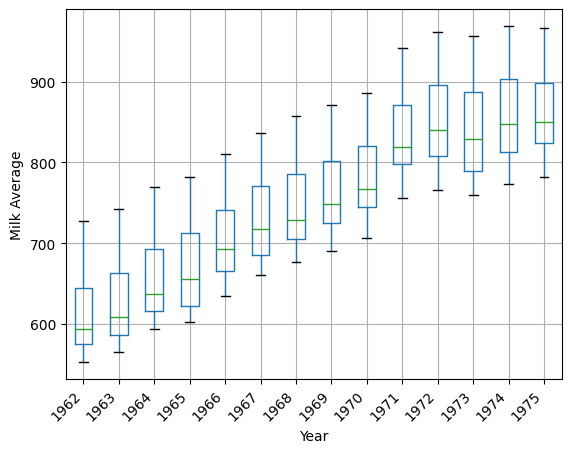

In [73]:
myt = pd.DataFrame(myt, columns = year)
bp = myt.boxplot()
plt.xlabel('Year'); plt.ylabel('Milk Average');
plt.xticks(rotation = 45, ha = 'right')
plt.show()

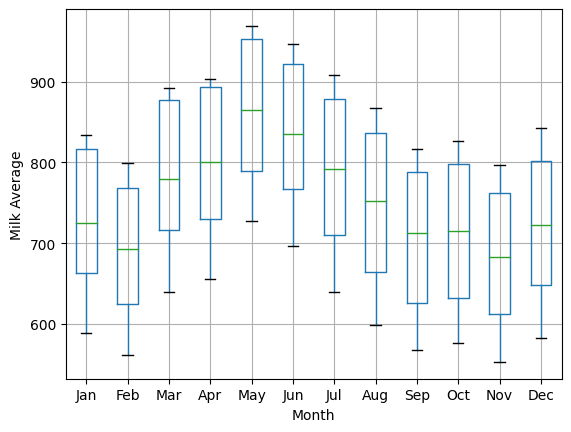

In [75]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
'Aug', 'Sep', 'Oct', 'Nov','Dec']
myd = pd.DataFrame(my, columns = month)
bpm = myd.boxplot()
plt.xlabel('Month'); plt.ylabel('Milk Average'); plt.show()

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

In [81]:
url= 'http://s3.amazonaws.com/assets.datacamp.com/course/dasi/present.txt'
birth= pd.read_table(url,sep=' ')

In [82]:
birth.head()

,year,boys,girls
1,1940,1211684,1148715
2,1941,1289734,1223693
3,1942,1444365,1364631
4,1943,1508959,1427901
5,1944,1435301,1359499


In [88]:
birth.to_csv('Noboyngirl.csv')

In [89]:
birth_year = birth.set_index('year')

In [94]:
birth_year.head()

,boys,girls
year,,
1940,1211684,1148715
1941,1289734,1223693
1942,1444365,1364631
1943,1508959,1427901
1944,1435301,1359499


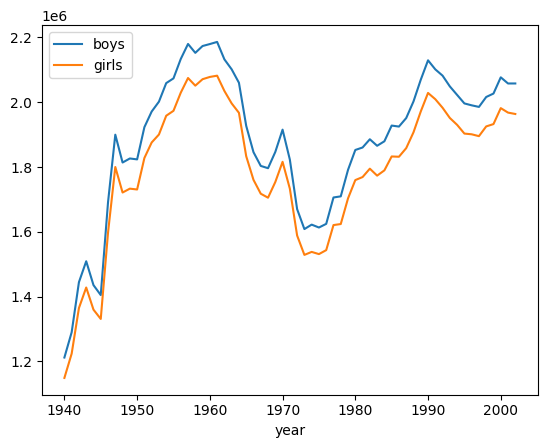

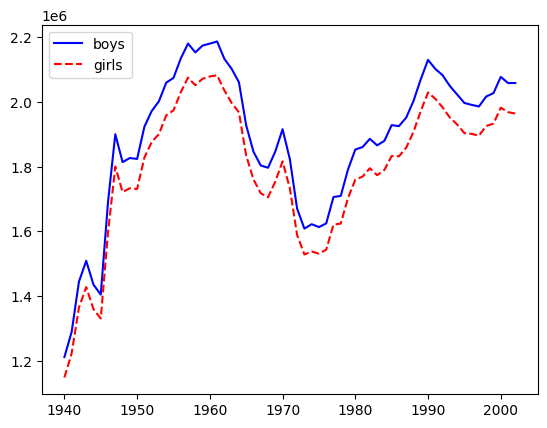

In [93]:
birth_year.plot(); plt.show()
boy,= plt.plot(birth_year['boys'],'b-', label='boys')
girl,= plt.plot(birth_year['girls'],'r--',label='girls')
plt.legend(handles=[boy, girl]); plt.show()

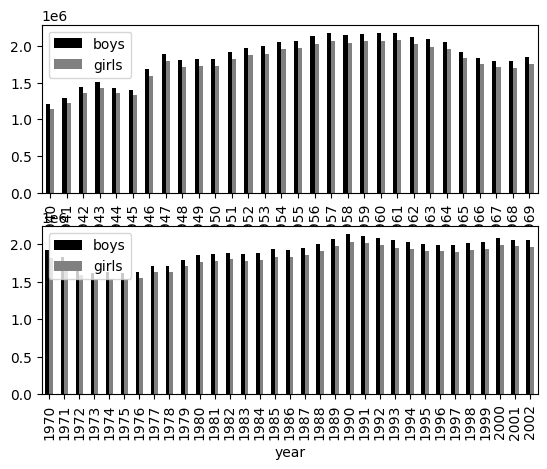

In [95]:
fig = plt.figure()
birth_year[:30].plot(kind='bar', color=['black','grey'], ax=fig.add_subplot(211))
birth_year[30:].plot(kind='bar', color=['black','grey'], ax=fig.add_subplot(212))
plt.show()

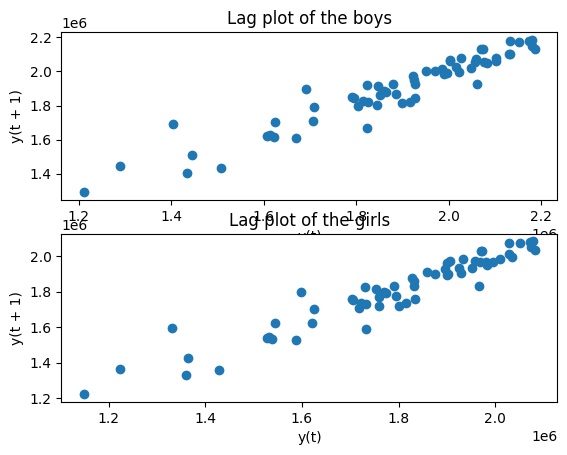

In [96]:
fig = plt.figure()
lag_plot(birth_year['boys'], ax=fig.add_subplot(211))
plt.title('Lag plot of the boys')
lag_plot(birth_year['girls'], ax=fig.add_subplot(212))
plt.title('Lag plot of the girls')
plt.show()

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
x = pd.read_csv('Yearly mean total sunspot number 1700 - 2017.csv',  delimiter = ';', header = None)
x.index = x[0];

In [100]:
x

,0,1,2,3,4
0,,,,,
1700.5,1700.5,8.3,-1.0,-1,1
1701.5,1701.5,18.3,-1.0,-1,1
1702.5,1702.5,26.7,-1.0,-1,1
1703.5,1703.5,38.3,-1.0,-1,1
1704.5,1704.5,60.0,-1.0,-1,1
...,...,...,...,...,...
2013.5,2013.5,94.0,6.9,5347,1
2014.5,2014.5,113.3,8.0,5273,1
2015.5,2015.5,69.8,6.4,8903,1


In [101]:
sunspot = x.drop(columns=[0, 2, 3, 4])

In [102]:
sunspot

,1
0,
1700.5,8.3
1701.5,18.3
1702.5,26.7
1703.5,38.3
1704.5,60.0
...,...
2013.5,94.0
2014.5,113.3
2015.5,69.8


Text(0.5, 0, 'Year')

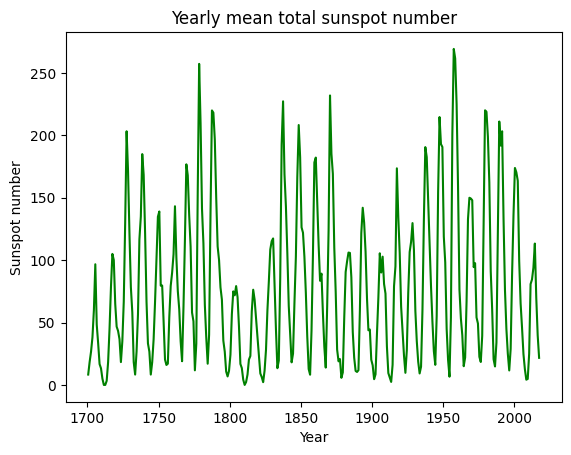

In [104]:
sunspot.plot(legend = False, color = "green"); plt.title('Yearly mean total sunspot number')
plt.ylabel('Sunspot number'); plt.xlabel('Year')

In [106]:
import pandas as pd
#import numpy as np
x = pd.read_csv('gdpquarterlychina1992.1-2017.4.csv', header = 0)

In [107]:
x.head()

,GDP
0,5234.8
1,6536.8
2,7122.5
3,8174.3
4,6803.1


In [110]:
dates = pd.date_range(start='1992', periods = len(x), freq='Q')

In [111]:
x.head()

,GDP
0,5234.8
1,6536.8
2,7122.5
3,8174.3
4,6803.1


In [112]:
x.index = dates

In [113]:
x.head()

,GDP
1992-03-31,5234.8
1992-06-30,6536.8
1992-09-30,7122.5
1992-12-31,8174.3
1993-03-31,6803.1


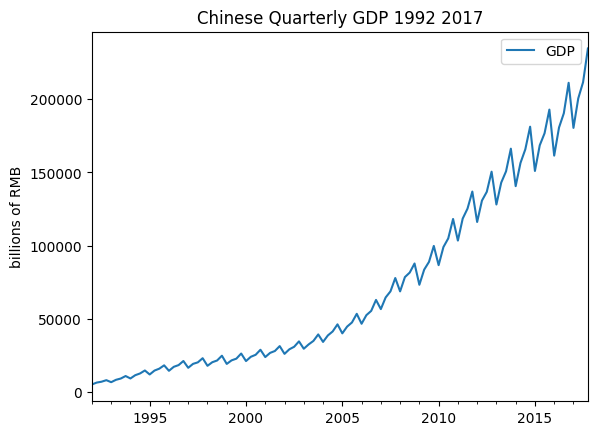

In [114]:
import matplotlib.pyplot as plt
x.plot(); plt.title('Chinese Quarterly GDP 1992 2017')
plt.ylabel('billions of RMB'); plt.show()

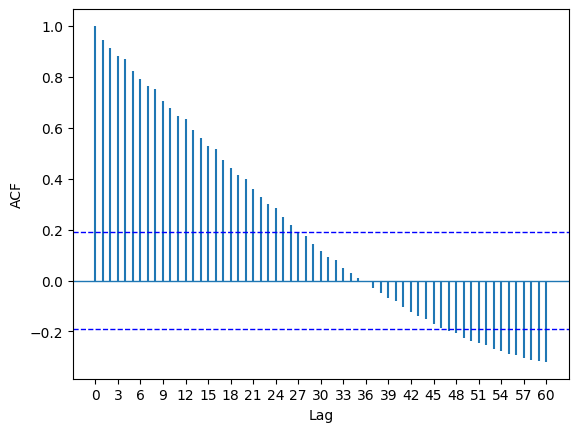

In [115]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(x, both = False, lag = 60)

In [116]:
from numpy import random
import pandas as pd
random.seed(135) # for repeat
x=random.normal(loc=0, scale=1, size=1000)

In [118]:
type(x)

numpy.ndarray

In [119]:
xts=pd.Series(x)

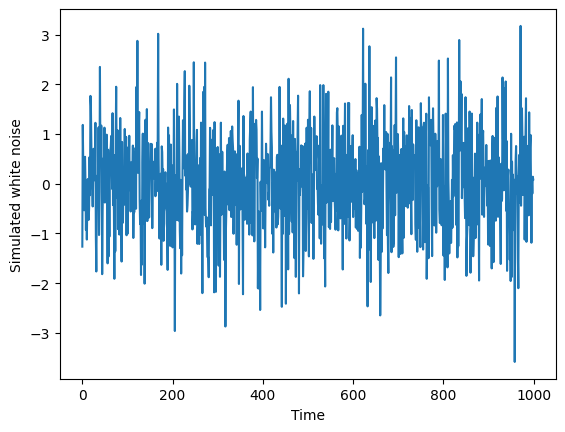

In [120]:
import matplotlib.pyplot as plt
xts.plot(); plt.xlabel('Time')
plt.ylabel('Simulated white noise'); plt.show()

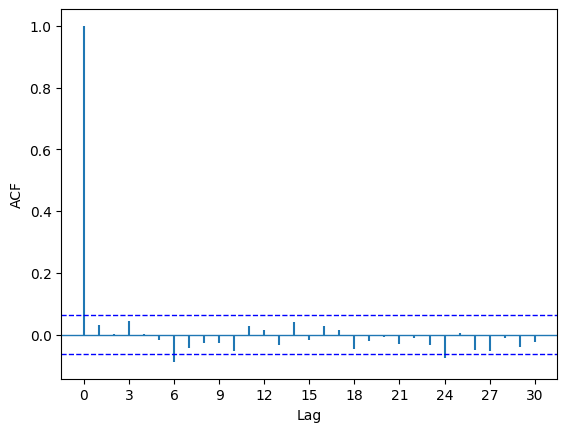

In [123]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(xts, both=False, lag=30)